# Name : Ayush Gaykar
# Prn : 20220802255


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import math


## 1. Data cleaning

In [2]:
# Data cleaning
df = pd.read_csv("banking.csv",skiprows = 2)

df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"May, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"May, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"May, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"May, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"May, 2017",198 sec,1,-1,0,unknown,no


In [3]:
df.tail()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
41892,41893,28.0,50000,172,married,"admin.,secondary",yes,no,yes,no,cellular,19,"Oct, 2017",2.05 min,2,-1,0,unknown,no
41893,41894,60.0,100000,0,married,"management,secondary",yes,no,no,no,telephone,19,"Oct, 2017",29.0833333333333 min,3,62,3,failure,no
41894,41895,30.0,4000,7529,single,"student,tertiary",no,no,no,no,cellular,19,"Oct, 2017",5.46666666666667 min,1,-1,0,unknown,yes
41895,41896,63.0,55000,12067,married,"retired,primary",yes,no,no,no,telephone,20,"Oct, 2017",36.45 min,1,-1,0,unknown,no
41896,41897,61.0,50000,1541,married,"admin.,secondary",yes,no,no,no,cellular,20,"Oct, 2017",0.983333333333333 min,1,104,3,failure,no


In [4]:
df=df.drop('customerid', axis=1)



In [5]:
df[['Job', 'Education']] = df['jobedu'].str.split(',', expand=True)
df = df.drop('jobedu', axis=1)

In [6]:
df.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"May, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"May, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"May, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"May, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"May, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
df.shape

(41897, 19)

In [8]:
df.describe()


,age,salary,balance,day,campaign,pdays,previous
count,41879.000000,41897.000000,41897.000000,41897.000000,41897.000000,41897.000000,41897.000000
mean,40.689677,56993.006659,1315.763849,15.843115,2.832422,33.153114,0.445712
std,10.021055,32106.010313,2982.731608,8.281688,3.184041,91.555646,2.145202
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,60.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,422.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1358.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,518.000000,275.000000


In [9]:
print(df.columns)


Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'Job', 'Education'],
      dtype='object')


In [10]:
df.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration      object
campaign       int64
pdays          int64
previous       int64
poutcome      object
response      object
Job           object
Education     object
dtype: object

## 2. Checking and filling missing values

In [11]:
null_val = df.isnull().sum()
null_val

age          18
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        45
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
Job           0
Education     0
dtype: int64

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
age          0.042963
salary       0.000000
balance      0.000000
marital      0.000000
targeted     0.000000
default      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.107406
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
response     0.071604
Job          0.000000
Education    0.000000
dtype: float64


In [13]:
# Fill missing values in 'age' with the mean or median
df['age'] = df['age'].fillna(df['age'].mean())  # or df['age'].median()


In [14]:
df['month'].mode()[0]

'May, 2017'

In [15]:
# Fill missing values in 'month' with the mode
df['month'] = df['month'].fillna(df['month'].mode()[0])


In [16]:
# Fill missing values in 'response' with the mode (either 'yes' or 'no')
df['response'] = df['response'].fillna(df['response'].mode()[0])



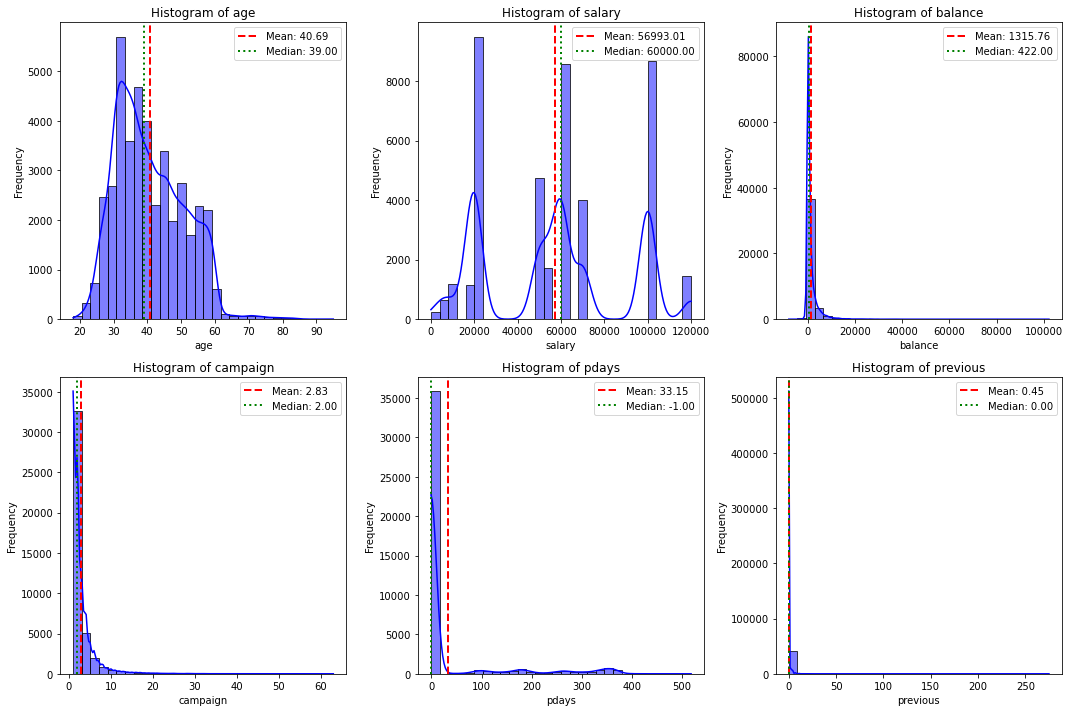

In [17]:
numerical_cols = ['age', 'salary', 'balance',  'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 1 row, n columns
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
    
    # Adding mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

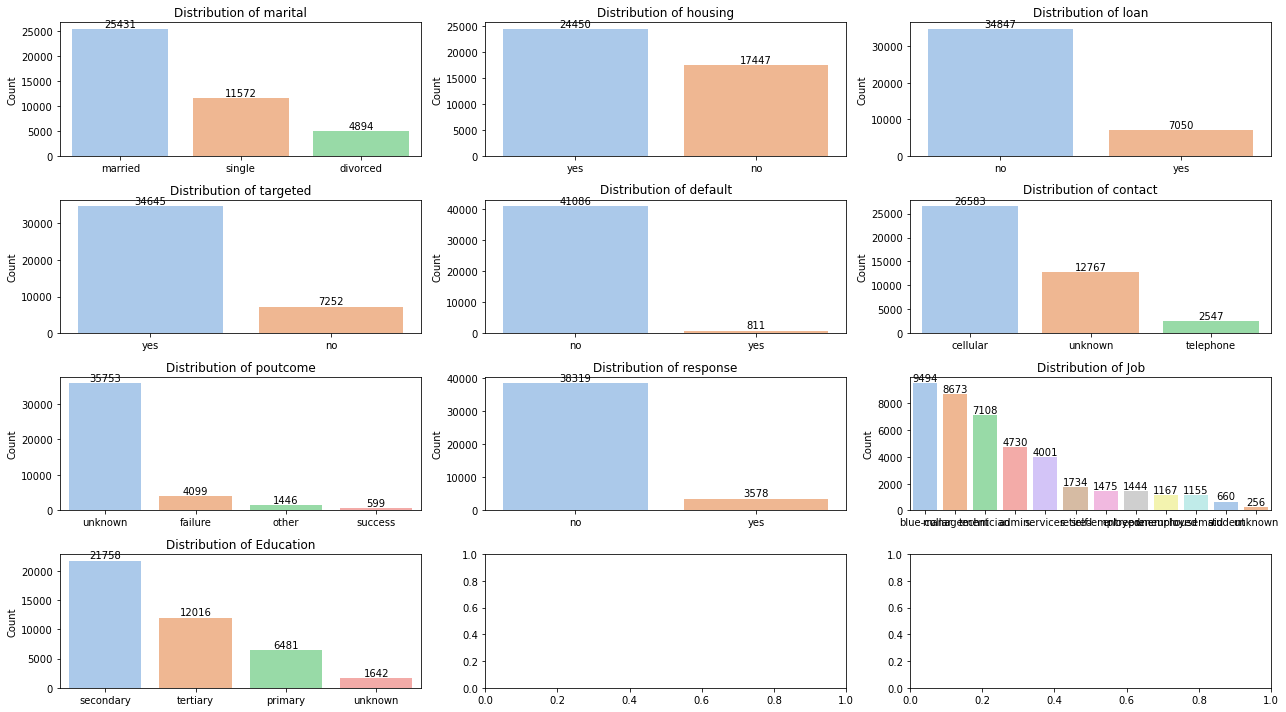

In [18]:
categorical_columns = ['marital', 'housing', 'loan', 'targeted', 'default', 'contact', 'poutcome', 'response','Job', 'Education']
fig, axes = plt.subplots(4, 3, figsize=(18, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 3. Checking Outliers using boxplot

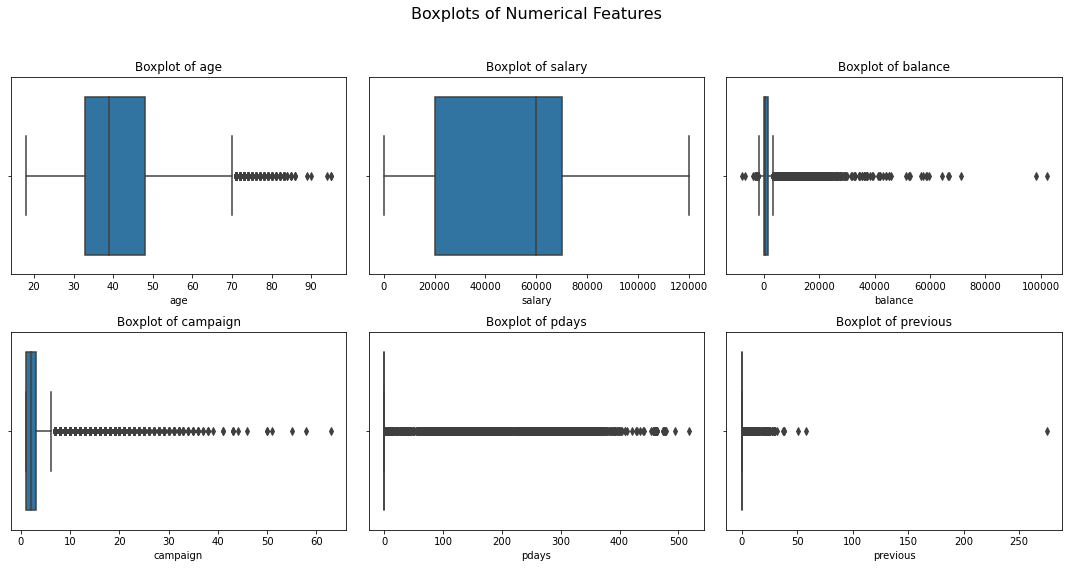

In [19]:
numerical_cols = ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous']

# Define grid layout (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  
fig.suptitle('Boxplots of Numerical Features', fontsize=16)  # Title for entire figure

# Loop through numerical columns and plot
for i, col in enumerate(numerical_cols):
    row = i // 3  # Determine row index
    col_index = i % 3  # Determine column index
    sns.boxplot(x=df[col], ax=axes[row, col_index])  
    axes[row, col_index].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

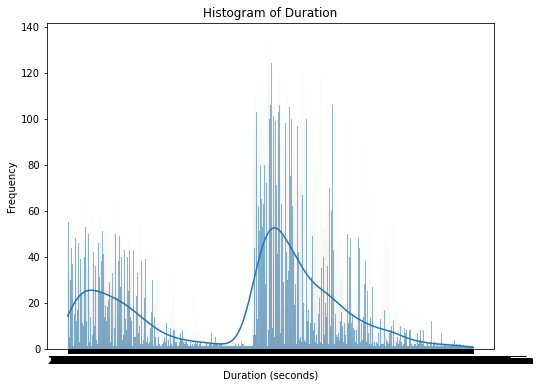

In [55]:

# Plot histogram of 'duration' column
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=30, kde=True)  # kde=True adds a Kernel Density Estimate (smooth curve)
plt.title('Histogram of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()



In [20]:
# Function to identify outliers using IQR
def identify_outliers(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify the outliers
        outliers_in_column = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_in_column
    return outliers

# Identify outliers in numerical columns
outliers = identify_outliers(df, numerical_cols)

# Print outliers for each column
for col, data in outliers.items():
    print(f'Outliers in {col}:')
    print(data[['age', 'balance', 'salary', 'duration']].head())  # Adjust columns to check relevant ones
    print("\n")


Outliers in age:
        age  balance  salary              duration
29158  83.0      425   55000              15.2 min
29261  75.0       46   55000               4.9 min
29263  75.0     3324   55000  2.48333333333333 min
29322  83.0     6236   55000  4.71666666666667 min
29865  75.0     3881   55000  2.26666666666667 min


Outliers in salary:
Empty DataFrame
Columns: [age, balance, salary, duration]
Index: []


Outliers in balance:
      age  balance  salary duration
34   51.0    10635  100000  336 sec
65   51.0     6530  100000   91 sec
69   35.0    12223   20000  177 sec
70   57.0     5935   20000  258 sec
186  40.0     4384   70000  315 sec


Outliers in campaign:
       age  balance  salary duration
758   59.0      307   70000  250 sec
780   30.0        4   50000  172 sec
906   27.0        0   70000  388 sec
1103  52.0      133   60000  253 sec
1105  43.0     1924   50000  244 sec


Outliers in pdays:
        age  balance  salary              duration
24060  33.0      882   50000  

## 4. Removing outliers

In [21]:
# Remove outliers in the specified numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the values are outside the IQR bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


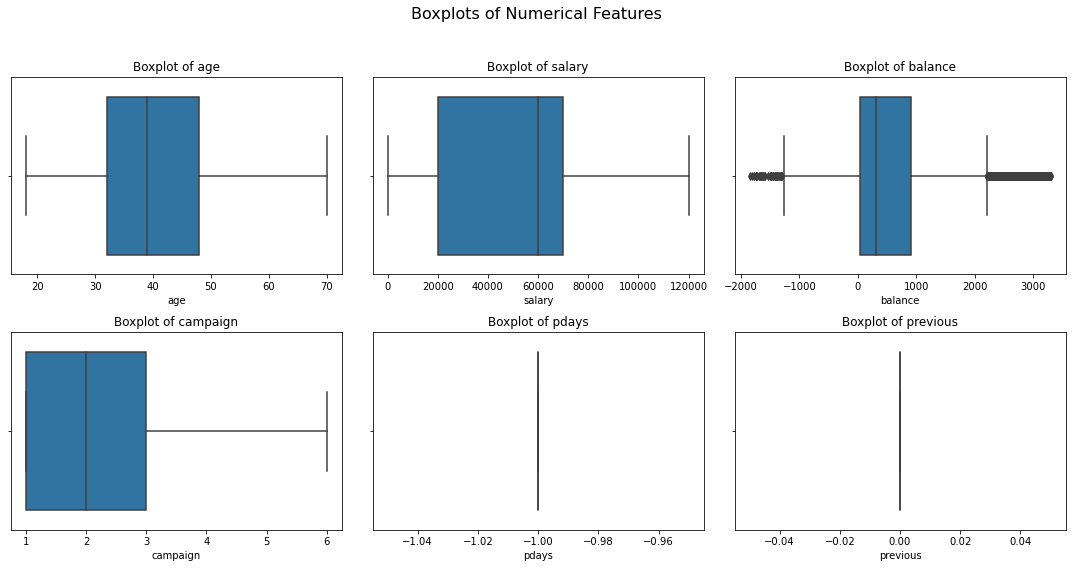

In [22]:
# Define grid layout (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  
fig.suptitle('Boxplots of Numerical Features', fontsize=16)  # Title for entire figure

# Loop through numerical columns and plot
for i, col in enumerate(numerical_cols):
    row = i // 3  # Determine row index
    col_index = i % 3  # Determine column index
    sns.boxplot(x=df[col], ax=axes[row, col_index])  
    axes[row, col_index].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

## 5. Univariate analysis

In [23]:
#Frequency Counts of each category

for col in categorical_columns:
    print(f"Value Counts for {col}:")
    print(df[col].value_counts(), "\n")


Value Counts for marital:
married     17648
single       8098
divorced     3516
Name: marital, dtype: int64 

Value Counts for housing:
yes    16656
no     12606
Name: housing, dtype: int64 

Value Counts for loan:
no     24019
yes     5243
Name: loan, dtype: int64 

Value Counts for targeted:
yes    24347
no      4915
Name: targeted, dtype: int64 

Value Counts for default:
no     28598
yes      664
Name: default, dtype: int64 

Value Counts for contact:
cellular     17054
unknown      10706
telephone     1502
Name: contact, dtype: int64 

Value Counts for poutcome:
unknown    29262
Name: poutcome, dtype: int64 

Value Counts for response:
no     27022
yes     2240
Name: response, dtype: int64 

Value Counts for Job:
blue-collar      6791
management       5774
technician       4988
admin.           3309
services         2891
retired          1146
entrepreneur     1007
self-employed    1007
housemaid         857
unemployed        856
student           462
unknown           174
Name: Jo

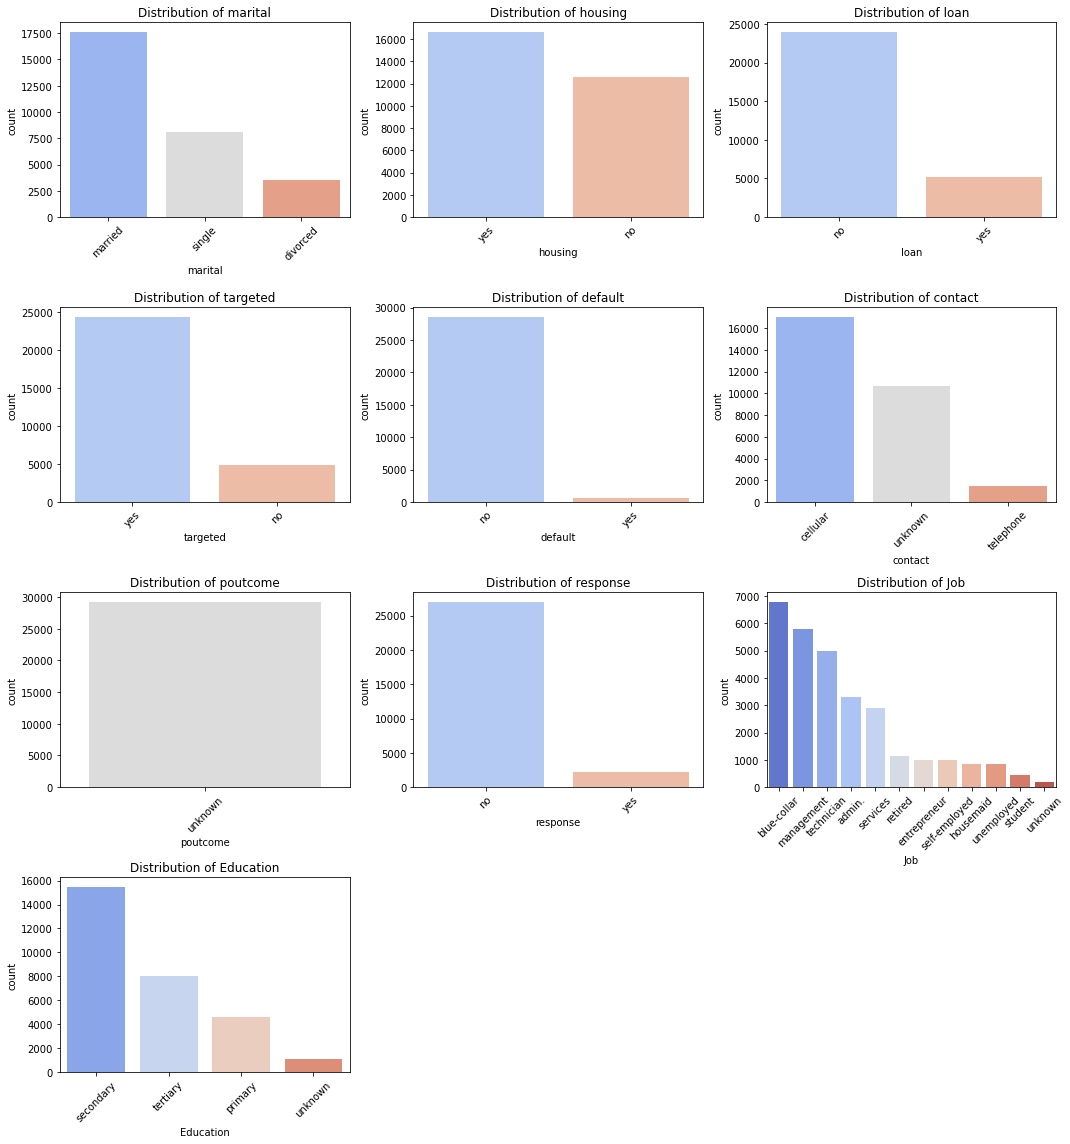

In [24]:
#Visualisation

num_cols = len(categorical_columns)

# Dynamically setting rows & cols
rows = math.ceil(num_cols / 3)  # At most 3 columns per row
cols = min(3, num_cols)  # Maximum 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

for i, col in enumerate(categorical_columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [25]:
#Analyzing numerical values

print(df[numerical_cols].describe())


                age         salary       balance      campaign    pdays  \
count  29262.000000   29262.000000  29262.000000  29262.000000  29262.0   
mean      40.346910   56285.216322    586.940298      2.205352     -1.0   
std        9.754355   32031.910963    802.785512      1.343362      0.0   
min       18.000000       0.000000  -1854.000000      1.000000     -1.0   
25%       32.000000   20000.000000     28.000000      1.000000     -1.0   
50%       39.000000   60000.000000    311.000000      2.000000     -1.0   
75%       48.000000   70000.000000    900.750000      3.000000     -1.0   
max       70.000000  120000.000000   3296.000000      6.000000     -1.0   

       previous  
count   29262.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  


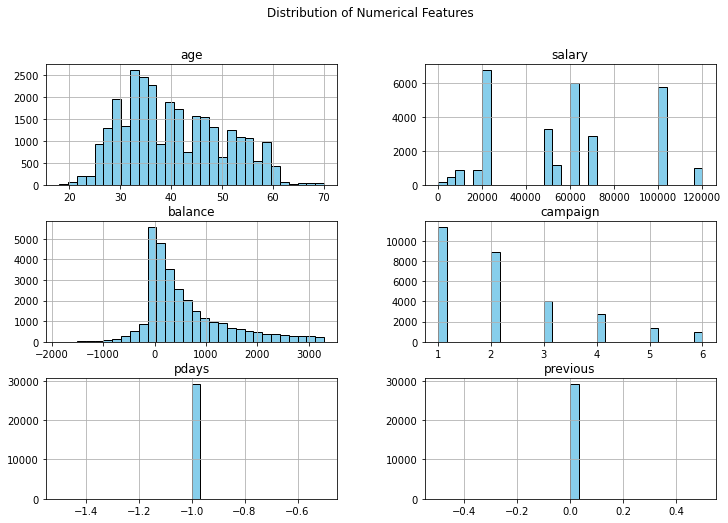

In [26]:
#plotting numeric variables
df[numerical_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()



## 6. Bivariate Analysis

In [27]:
print(df['response'].unique())


['no' 'yes']


In [28]:
df['response_numeric'] = df['response'].map({'yes': 1, 'no': 0})


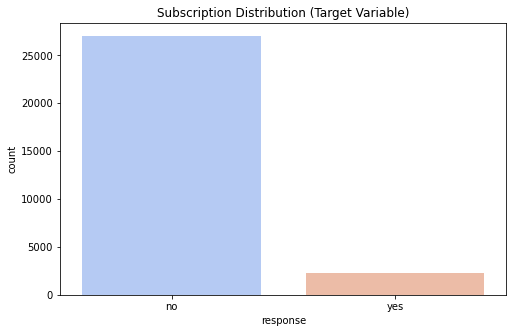

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='response', palette='coolwarm')
plt.title("Subscription Distribution (Target Variable)")
plt.show()

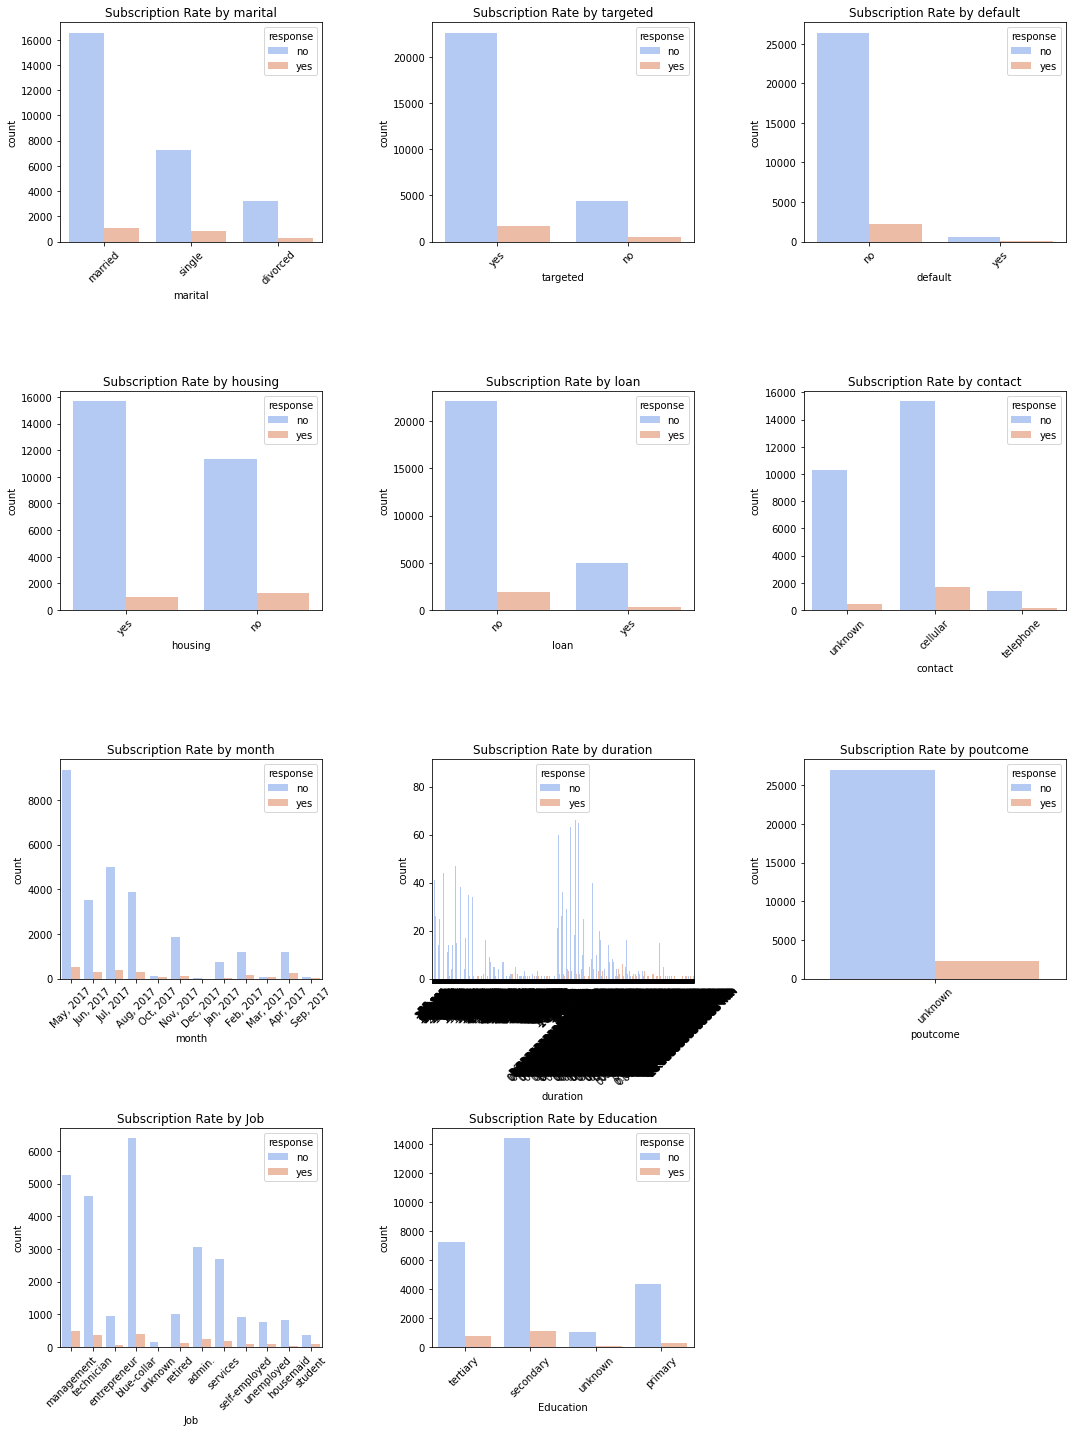

In [30]:
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'response']

# Define number of rows and columns for subplots
num_cols = 3  # Number of columns per row
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  # Auto-calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate over

# Loop through categorical columns and create countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='response', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Subscription Rate by {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot frames

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

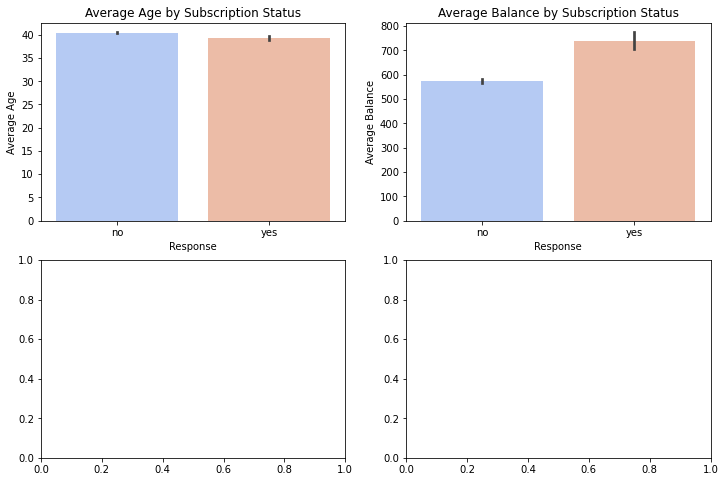

In [31]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# 1️⃣ Age vs. Response
sns.barplot(data=df, x="response", y="age", palette="coolwarm", estimator=np.mean, ax=axes[0, 0])
axes[0, 0].set_title("Average Age by Subscription Status")
axes[0, 0].set_xlabel("Response")
axes[0, 0].set_ylabel("Average Age")

# 2️⃣ Balance vs. Response
sns.barplot(data=df, x="response", y="balance", palette="coolwarm", estimator=np.mean, ax=axes[0, 1])
axes[0, 1].set_title("Average Balance by Subscription Status")
axes[0, 1].set_xlabel("Response")
axes[0, 1].set_ylabel("Average Balance")

# 3️⃣ Call Duration vs. Response
sns.barplot(data=df, x="response", y="duration", palette="coolwarm", estimator=np.mean, ax=axes[1, 0])
axes[1, 0].set_title("Average Call Duration by Subscription Status")
axes[1, 0].set_xlabel("Response")
axes[1, 0].set_ylabel("Average Call Duration (seconds)")

# 4️⃣ Campaign Contacts vs. Response
sns.barplot(data=df, x="response", y="campaign", palette="coolwarm", estimator=np.mean, ax=axes[1, 1])
axes[1, 1].set_title("Average Number of Contacts by Subscription Status")
axes[1, 1].set_xlabel("Response")
axes[1, 1].set_ylabel("Average Number of Contacts")

plt.tight_layout()  # Adjust spacing between plots
plt.show()


## 7. Multivariate Analysis

In [ ]:

# Convert categorical target variable to numeric for correlation analysis
df['response_numeric'] = df['response'].map({'yes': 1, 'no': 0})

# Compute correlation matrix
correlations = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
bins = [18, 30, 40, 50, 100]  # Age ranges
labels = ['<30', '30-40', '40-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Set figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plot
sns.countplot(data=df, x='age_group', hue='response', palette='coolwarm', dodge=True)

plt.title("Subscription Rate by Age Group, Marital Status, and Job Type")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Subscribed", loc="upper right")
plt.xticks(rotation=0)
plt.show()

In [ ]:

# Convert 'duration' to numeric (if it's in string format like '261 sec')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Create Call Duration Groups
bins = [0, 100, 300, df['duration'].max()]
labels = ['Short (<100s)', 'Medium (100-300s)', 'Long (>300s)']
df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Set figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plot
sns.countplot(data=df, x='contact', hue='duration_group', palette='coolwarm')

plt.title("Impact of Contact Method and Call Duration on Subscription Rate")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.legend(title="Call Duration")
plt.xticks(rotation=0)
plt.show()


In [ ]:
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

# Dynamically define bins based on actual min/max values
min_balance = df['balance'].min()
max_balance = df['balance'].max()

# Define balance bins dynamically
bins = [min_balance, 0, df['balance'].quantile(0.50), max_balance]  # Low, Medium, High
labels = ['Low (<0)', 'Medium', 'High (>Median)']
df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)

# Set figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plot
sns.countplot(data=df, x='poutcome', hue='balance_group', palette='coolwarm')

plt.title("Impact of Previous Campaign Outcome & Balance on Subscription Rate")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.legend(title="Balance Group")
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df['Job'], df['Education'], values=df['response_numeric'], aggfunc='mean').round(2)


In [ ]:
pd.crosstab(df['marital'], df['housing'], values=df['response_numeric'], aggfunc='mean').round(2)


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="marital", y="response_numeric", hue="housing", palette="coolwarm")
plt.title("Subscription Rate by Marital Status & Housing Loan")
plt.show()


In [ ]:
# Function to convert 'duration' to seconds
def convert_to_seconds(value):
    if ' sec' in value:
        return float(value.replace(' sec', ''))
    elif ' min' in value:
        return float(value.replace(' min', '')) * 60  # Convert minutes to seconds
    else:
        return np.nan  # Handle unexpected values

# Apply conversion
df['duration'] = df['duration'].apply(convert_to_seconds)


# Convert 'duration' into categories (short, medium, long calls)
df['duration_category'] = pd.qcut(df['duration'].astype(float), q=3, labels=['Short', 'Medium', 'Long'])

# Create pivot table
pivot_table = df.pivot_table(index='contact', columns='duration_category', values='response', aggfunc=lambda x: (x == 'yes').mean())

# Display the pivot table
print(pivot_table)
